<h1><b><center>Forecasting and Demand Planning using ARIMA</center></b></h1>

                                                                                                                   -222BDA40

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv('Data Source.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-8-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-8-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6-12-2016,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [11]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [12]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
df['Sales'].max()

22638.48

In [14]:
# Count of each category
category_counts = df['Category'].value_counts()
print(category_counts)

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [15]:
# Count of each segment
segment_counts = df['Segment'].value_counts()
print(segment_counts)

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


In [16]:
start_date = df['Order Date'].min()
end_date = df['Order Date'].max()
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2014-01-03 00:00:00
End Date: 2017-12-30 00:00:00


In [17]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


## EDA

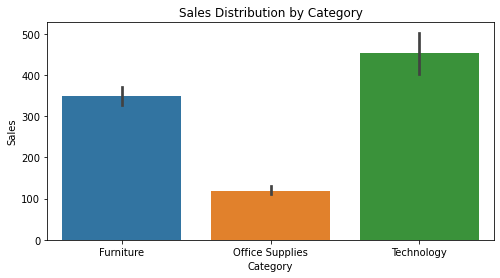

In [19]:
# Box plot of Sales by Category
plt.figure(figsize=(8,4))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()

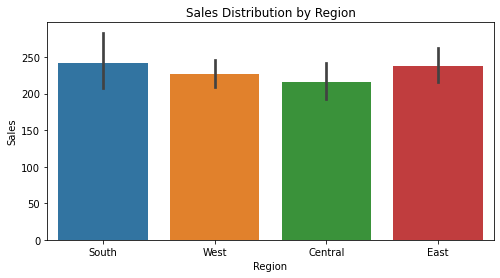

In [20]:
# Box plot of Sales by Region
plt.figure(figsize=(8,4))
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Sales Distribution by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.show()

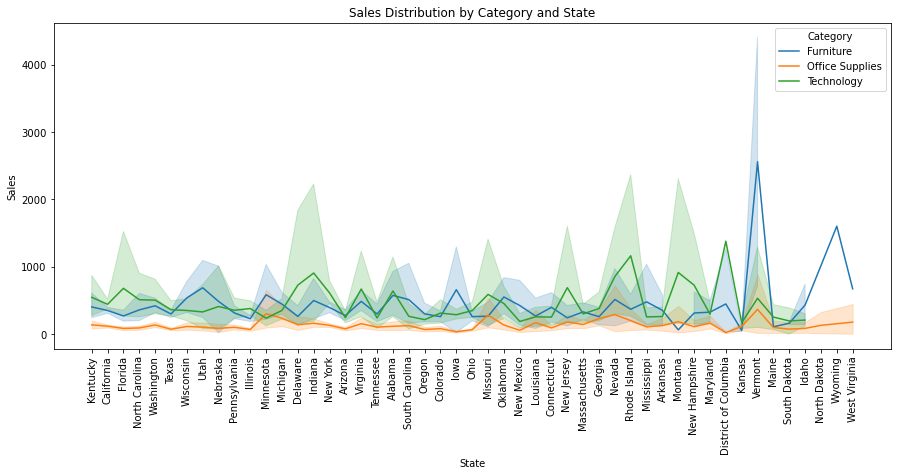

In [21]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='State', y='Sales', hue='Category', data=df)
plt.title('Sales Distribution by Category and State')
plt.ylabel('Sales')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()

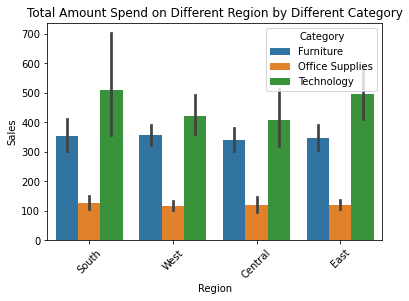

In [22]:
sns.barplot(x=df['Region'],y=df['Sales'],data=df,hue=df['Category'])
plt.title('Total Amount Spend on Different Region by Different Category')
plt.legend(title='Category',loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [23]:
s=df.groupby(['Category','State'])['Sales'].max().reset_index()

In [24]:
s

,Category,State,Sales
0,Furniture,Alabama,1819.860
1,Furniture,Arizona,1272.630
2,Furniture,Arkansas,1067.940
3,Furniture,California,3610.848
4,Furniture,Colorado,1325.760
...,...,...,...
137,Technology,Utah,1499.950
138,Technology,Vermont,1294.750
139,Technology,Virginia,8749.950
140,Technology,Washington,13999.960


In [25]:
s.max()                        #wyoming is a state in US to the West Region

Category    Technology
State          Wyoming
Sales         22638.48
dtype: object

In [26]:
a=df.groupby('Region')['Sales'].sum().reset_index()

In [27]:
a.max()

Region           West
Sales     725457.8245
dtype: object

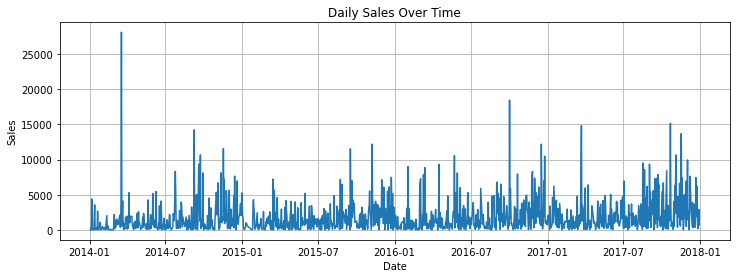

In [28]:
daily_sales = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(12, 4))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [29]:
#df.rename(columns={'Sales':'Value'},inplace=True)

In [30]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Forecast the sales for technology

From the visualizations performed above it is clear that the sales is highest for the category 'Technology', hence performing the forecast to determine if the sales continue to increase over time.

In [31]:
tech=df.loc[df['Category']== 'Technology']

In [32]:
tech.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,6-14-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,6-14-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,9-1-2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,1-20-2016,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,12-10-2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [33]:
tech=tech[['Order Date', 'Sales']]

In [34]:
tech.head()

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-12-08,1097.544


In [35]:
tech=tech.sort_values('Order Date')

In [36]:
tech=tech.set_index('Order Date')

In [38]:
tech['Sales'].idxmax()

Timestamp('2014-03-18 00:00:00')

In [39]:
tech['Sales'].max()

22638.48

In [40]:
tec= tech['Sales'].resample('MS').mean()     # mean value/sales for each month; MS-Month Start Frequency

In [41]:
tec.head(10)

Order Date
2014-01-01     349.254444
2014-02-01     201.063750
2014-03-01    1477.780636
2014-04-01     353.670538
2014-05-01     355.550963
2014-06-01     401.712619
2014-07-01     285.861929
2014-08-01     341.098519
2014-09-01     663.860261
2014-10-01     397.933933
Freq: MS, Name: Sales, dtype: float64

In [42]:
tec.idxmax()

Timestamp('2014-03-01 00:00:00', freq='MS')

In [43]:
tec.max()

1477.7806363636364

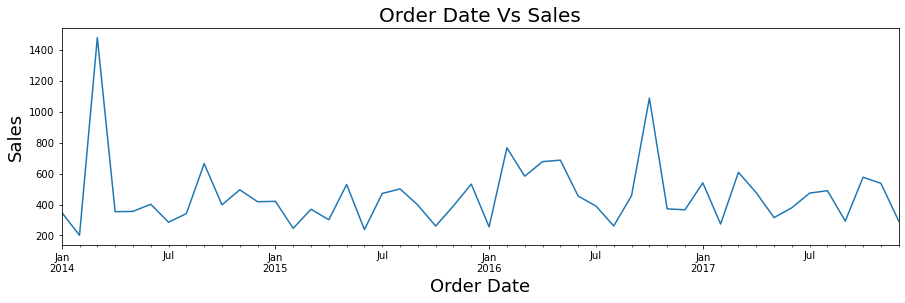

In [44]:
tec.plot(figsize=(15,4))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

<b>Inference:</b> The graph shows that the sales of the supermarket have been increasing over time.The sudden increase observed in 2014 may be due to one-time spike in demand due to the change in value of the product. There are some fluctuations 
in the sales, but the overall trend is upwards. 

## Stationarity Check Using Augmented Dickey-Fuller (ADF) test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series data is stationary or not.
We apply the ADF test to the original time series data to decide whether differencing is required to make the series stationary. A stationary time series is a key assumption for ARIMA modeling, as it simplifies the modeling process and helps ensure that the model's predictions are meaningful.

In [45]:
import statsmodels.api as sm
result = sm.tsa.adfuller(tech['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
critical_values = result[4]
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -42.80330580944363
p-value: 0.0
Critical Values:
   1%: -3.4338973545418083
   5%: -2.8631069584819104
   10%: -2.5676041937532355


<b>Inference:</b> The ADF test statistic is -42.80330580944363 and the p-value is 0.0. This means that the null hypothesis of 
non-stationarity can be rejected with a very high degree of confidence (the p-value is much less than 0.05).
Therefore, the time series data is stationary.

In [46]:
#tech.set_index('Order Date', inplace=True) 

In [47]:
# Perform seasonal decomposition on the time series
decomposition = sm.tsa.seasonal_decompose(tec, model='additive', period=12)

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

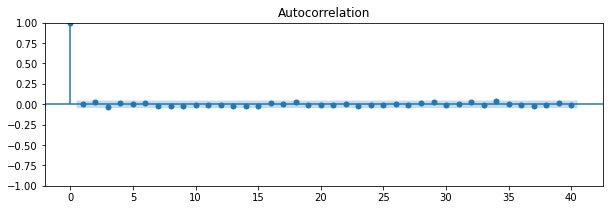

In [49]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10,3))
plot_acf(tech, lags=40, ax=ax)
plt.title("Autocorrelation")
plt.show()

C:\Users\Arya Surendran\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


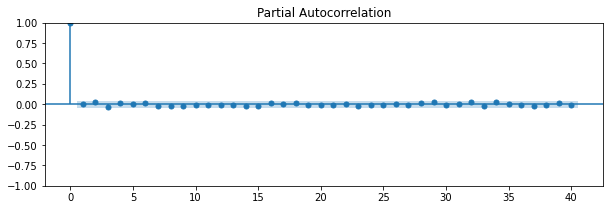

In [50]:
# PACF Plot
fig, ax = plt.subplots(figsize=(10,3))
plot_pacf(tech, lags=40, ax=ax)
plt.title("Partial Autocorrelation")
warnings.filterwarnings("ignore")
plt.show()

### Model Selection

#### ARIMA (AutoRegressive Integrated Moving Average)

In [51]:
# Build an ARIMA model
#p =1  Autoregressive order
#d =1  Differencing order
#q =1  Moving average order

In [52]:
model=sm.tsa.ARIMA(tec, order=(1,1,1))

In [53]:
res_tec=model.fit()

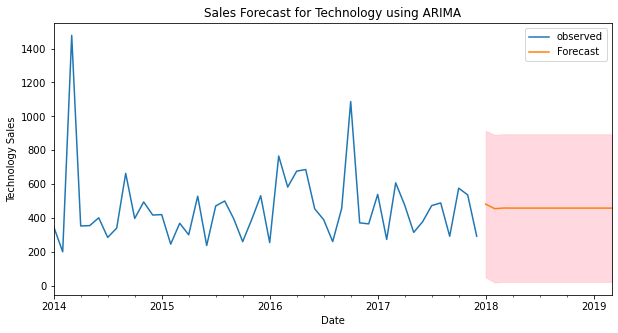

In [54]:
pred_uc = res_tec.get_forecast(steps = 15)
pred_ci = pred_uc.conf_int()
ax = tec.plot(label='observed', figsize=(10,5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='pink',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
ax.set_title('Sales Forecast for Technology using ARIMA')
plt.legend()
plt.show()

#### SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors)

In [55]:
mod=sm.tsa.statespace.SARIMAX(tec, order=(1,1,1), seasonal_order= (1,1,0,12))

In [56]:
results=mod.fit()

In [57]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2991      0.229     -1.305      0.192      -0.748       0.150
ma.L1         -0.9989     20.391     -0.049      0.961     -40.964      38.966
ar.S.L12      -0.7027      0.103     -6.831      0.000      -0.904      -0.501
sigma2      6.232e+04   1.26e+06      0.049      0.961   -2.41e+06    2.53e+06


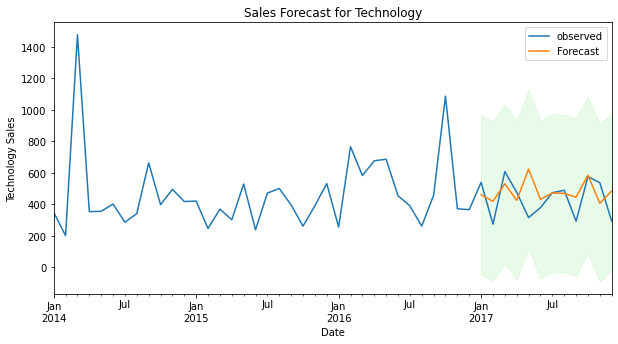

In [58]:
pred=results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax=tec['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast',
                        alpha=1, figsize=(10,5))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='lightgreen', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
ax.set_title('Sales Forecast for Technology')
plt.legend()

plt.show()

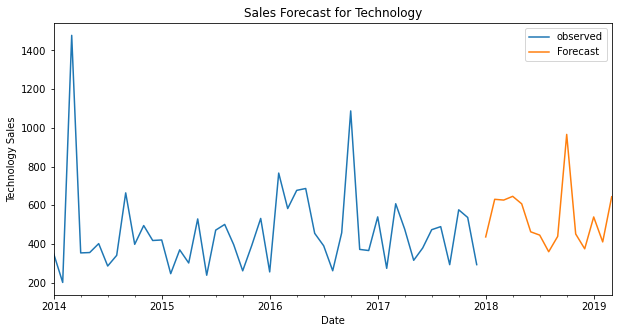

In [60]:
pred_uc = results.get_forecast(steps = 15)
pred_ci = pred_uc.conf_int()
ax = tec.plot(label='observed', figsize=(10,5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
ax.set_title('Sales Forecast for Technology')
plt.legend()
plt.show()

In [61]:
tec_forecast = pred.predicted_mean
tec_truth = tec['2017-01-01':]
mse = ((tec_forecast - tec_truth) ** 2).mean()
print('MSE of forecast :{}'.format(round(mse,2)))

MSE of forecast :17610.86


From the two models used above SARIMAX provided a better result.

## Forecast for Office Supplies

In reference to the EDA performed; Office Supplies had the least sales hence perfroming a forecast to determine if the sales increases or decreases over time.

In [62]:
off= df.loc[df['Category']=='Office Supplies']

In [63]:
off.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,6-14-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,6-14-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,6-14-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [64]:
off=off[['Order Date', 'Sales']]

In [65]:
off=off.sort_values('Order Date')

In [66]:
off=off.set_index('Order Date')

In [67]:
off_sup= off['Sales'].resample('MS').mean()

In [68]:
off_sup.head()

Order Date
2014-01-01     97.021600
2014-02-01     34.571742
2014-03-01     84.371363
2014-04-01    134.398482
2014-05-01    100.501746
Freq: MS, Name: Sales, dtype: float64

In [69]:
off_sup.idxmax()

Timestamp('2017-01-01 00:00:00', freq='MS')

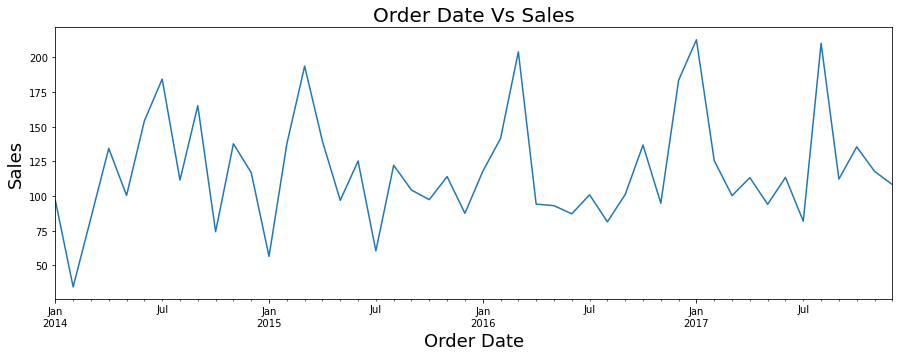

In [70]:
off_sup.plot(figsize=(15,5))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

In [71]:
# Perform seasonal decomposition on the time series
decom= sm.tsa.seasonal_decompose(off_sup, model='additive')

In [72]:
mod_off=sm.tsa.statespace.SARIMAX(off_sup, order=(1,1,1), seasonal_order= (1,1,0,12))

In [73]:
res=mod_off.fit()

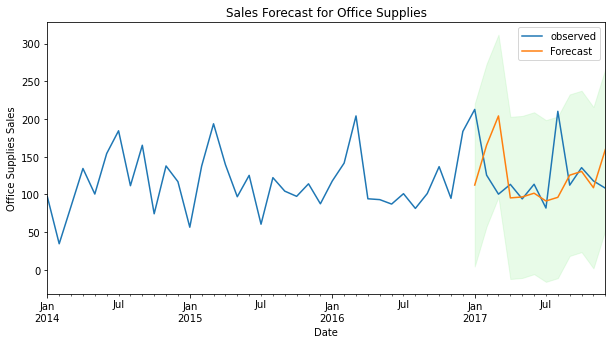

In [74]:
pred=res.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax=off_sup['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast',
                        alpha=1, figsize=(10,5))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='lightgreen', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
ax.set_title('Sales Forecast for Office Supplies')
plt.legend()

plt.show()

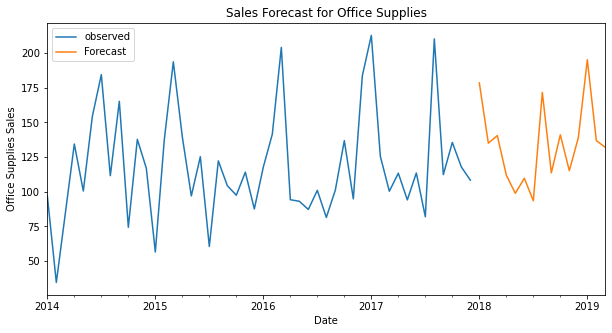

In [75]:
pred_uc = res.get_forecast(steps = 15)
pred_ci = pred_uc.conf_int()
ax = off_sup.plot(label='observed', figsize=(10,5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
ax.set_title('Sales Forecast for Office Supplies')
plt.legend()
plt.show()

In [76]:
OS_forecast = pred.predicted_mean
OS_truth = off_sup['2017-01-01':]
mse = ((OS_forecast - OS_truth) ** 2).mean()
print('MSE of forecast :{}'.format(round(mse,2)))

MSE of forecast :3239.24
